In [1]:
import numpy as np
import sys
sys.path.append('analyze_results/figures_code/')

In [2]:
feature_extraction = ['', '-mp', '-sp']

In [3]:
best_sigma_dict = np.load('/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/best_layer_sigma_info/best_sigma.npz')
best_gpt2xl_layer_dict = np.load('/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/best_layer_sigma_info/best_gpt2xl_layer.npz')
best_gaussian_dict =  np.load('/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/best_layer_sigma_info/best_gaussian.npz')

In [18]:
datasets = ['pereira']
for d in datasets:
    
    if d == 'pereira':
        exp = ['_384', '_243']
    else:
        exp = ['']
        
    for e in exp:
        
        best_sigma_value = str(best_sigma_dict[f'{d}{e}_out_of_sample_r2_shuffled'])
        OASM_acts = np.load(f'/data/LLMs/data_processed/{d}/acts/X_OASM-all-sigma.npz')
        OASM_best_sigma = OASM_acts[best_sigma_value]
        best_gaussian_value = best_gaussian_dict[f'{d}{e}']
        gaussian_model = np.load(f'/data/LLMs/data_processed/{d}/acts/X_gaussian.npz')[f'layer_{best_gaussian_value}']
        
        print(gaussian_model.shape)
        
        for fe in feature_extraction:
            
            gpt2xl_pereira = np.load(f'/data/LLMs/data_processed/{d}/acts/X_gpt2-xl{fe}.npz')
            
            best_gpt2xl_layer = best_gpt2xl_layer_dict[f'{d}{e}_out_of_sample_r2_shuffled{fe}']
        
            gpt2xl_best_layer_acts =  gpt2xl_pereira[f"layer_{best_gpt2xl_layer}"]
            
            print(gpt2xl_best_layer_acts.shape)
            
            gpt2xl_OASM_stacked = np.hstack((gpt2xl_best_layer_acts, OASM_best_sigma))
            
            gaussian_OASM_stacked = np.hstack((gaussian_model, OASM_best_sigma))
            
            np.savez(f'/data/LLMs/data_processed/{d}/acts/X_gpt2-xl{fe}_OASM{e}', **{'layer1': gpt2xl_OASM_stacked})
            np.savez(f'/data/LLMs/data_processed/{d}/acts/X_gaussian_OASM{e}', **{'layer1': gaussian_OASM_stacked})

(627, 1600)
(627, 1600)
(627, 1600)
(627, 1600)
(627, 1600)
(627, 1600)
(627, 1600)
(627, 1600)


(array([  6.,  41., 109., 240., 359., 371., 285., 140.,  40.,   9.]),
 array([-3.19613168, -2.57115111, -1.94617053, -1.32118996, -0.69620939,
        -0.07122881,  0.55375176,  1.17873234,  1.80371291,  2.42869349,
         3.05367406]),
 <BarContainer object of 10 artists>)

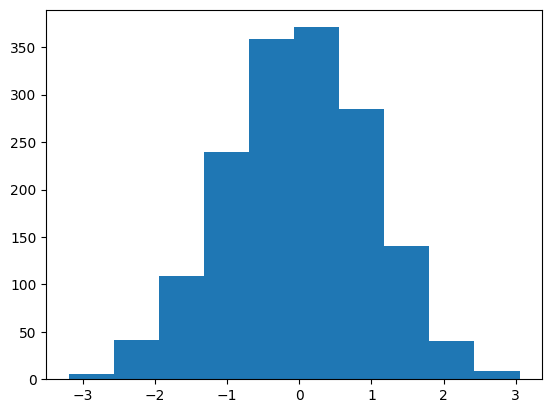

In [23]:
from matplotlib import pyplot as plt
plt.hist(gaussian_model[0])

In [16]:
np.load(f'/data/LLMs/data_processed/{d}/acts/X_gaussian_OASM{e}.npz')['layer1'].shape

(627, 2227)

In [12]:
print(gpt2xl_OASM_stacked.nbytes / 1e9, "GB")

0.011170632 GB
